In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

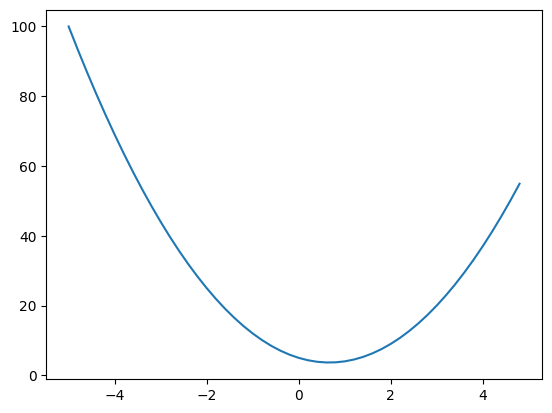

In [3]:
xs = np.arange(-5, 5, 0.2)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [4]:
h = 0.000001
x = 3
(f(x+h) - f(x))/h

14.000003002223593

In [5]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [6]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print(f'd1: {d1}')
print(f'd2: {d2}')
print(f'slope: {(d2 - d1)/h}')

d1: 4.0
d2: 4.0001
slope: 0.9999999999976694


In [56]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward 
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):
            node._backward()

a = Value(5.0, label='a')
b = Value(-2.0, label='b')
c = Value(3.0, label='c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=14.0)

In [8]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label="{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

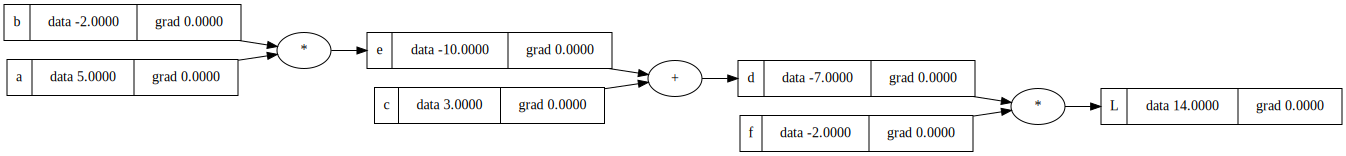

In [9]:
draw_dot(L)

L = d * f
dL/dd =? 
ans = f

dL/df = d
dL/de = (dL/dd)(dd/de)
d = c+e
      = f*1 = f

dL/dc = f

dL/db = (dL/dd)(dd/de)(de/db)
      = f*1*a

In [10]:
# a = Value(5.0, label='a')
# b = Value(-2.0, label='b')
# c = Value(3.0, label='c')
# f = Value(-2.0, label='f')

# L.grad = 1
# d.grad = -2.0
# f.grad = -7.0
# c.grad = -2.0
# e.grad = -2.0
# b.grad = -10.0
# a.grad = 4.0

# e = a*b; e.label = 'e'
# d = e+c; d.label = 'd'
# L = d*f; L.label = 'L'
# print(L)

# a.data += 0.01*a.grad
# b.data += 0.01*b.grad
# c.data += 0.01*c.grad
# f.data += 0.01*f.grad

# e = a*b; e.label = 'e'
# d = e+c; d.label = 'd'
# L = d*f; L.label = 'L'
# print(L)

In [11]:
# def lol():
    
#     h = 0.001

#     a = Value(5.0, label='a')
#     b = Value(-2.0, label='b')
#     c = Value(3.0, label='c')
#     e = a*b; e.label = 'e'
#     d = e+c; d.label = 'd'
#     f = Value(-2.0, label='f')
#     L = d*f; L.label = 'L'
#     L1 = L.data

#     a = Value(5.0, label='a')
#     b = Value(-2.0, label='b')
#     a.data += h
#     c = Value(3.0, label='c')
#     e = a*b; e.label = 'e'
#     d = e+c; d.label = 'd'
#     f = Value(-2.0, label='f')
#     L = d*f; L.label = 'L'
#     L2 = L.data

#     print((L2-L1)/h)

# lol()

In [57]:
# basic nueral network

# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [59]:
o.backward()

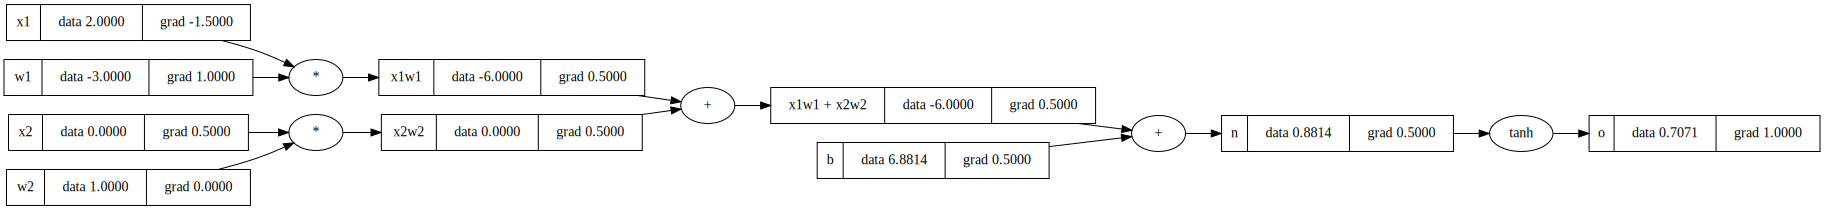

In [60]:
draw_dot(o)

In [54]:
o.grad = 1

# implementing topological sort on the nueral network to automate backprop
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in topo[::-1]:
    node._backward()

In [41]:
o.grad = 1

In [42]:
o._backward()

In [43]:
n._backward()

In [44]:
b._backward()

In [45]:
x1w1x2w2._backward()

In [46]:
x1w1._backward()
x2w2._backward()

In [69]:
# o.grad = 1
# n.grad = 0.5
# x1w1x2w2.grad = 0.5
# b.grad = 0.5
# x1w1.grad = 0.5
# x2w2.grad = 0.5
# x1.grad = w1.data * x1w1.grad
# w1.grad = x1.data * x1w1.grad
# x2.grad = w2.data * x2w2.grad
# w2.grad = x2.data * x2w2.grad

In [ ]:
# 1 - o.data**2

In [71]:
# o = tanh(n)
# do/dn = 1 - o**2
